In [2]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [8]:
X,y = mnist.data , mnist.target

In [12]:
import matplotlib.pyplot as plt

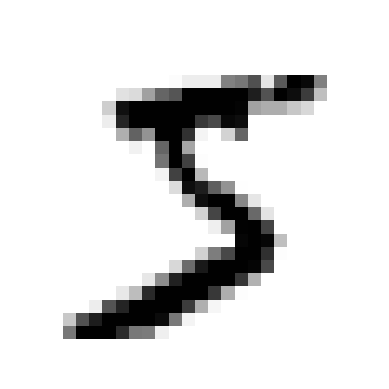

'5'

In [18]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis("off")
    plt.show()
some_digit=X[0]
plot_digit(some_digit)
y[0]

In [19]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [23]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [28]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [32]:
 cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred) # tp/tp+fp

0.8370879772350012

In [40]:
recall_score(y_train_5,y_train_pred) # tp/tp+fn

0.6511713705958311

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [61]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [72]:
from sklearn.metrics import precision_recall_curve
precisions , recalls , thresholds = precision_recall_curve(y_train_5,y_scores)

In [73]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

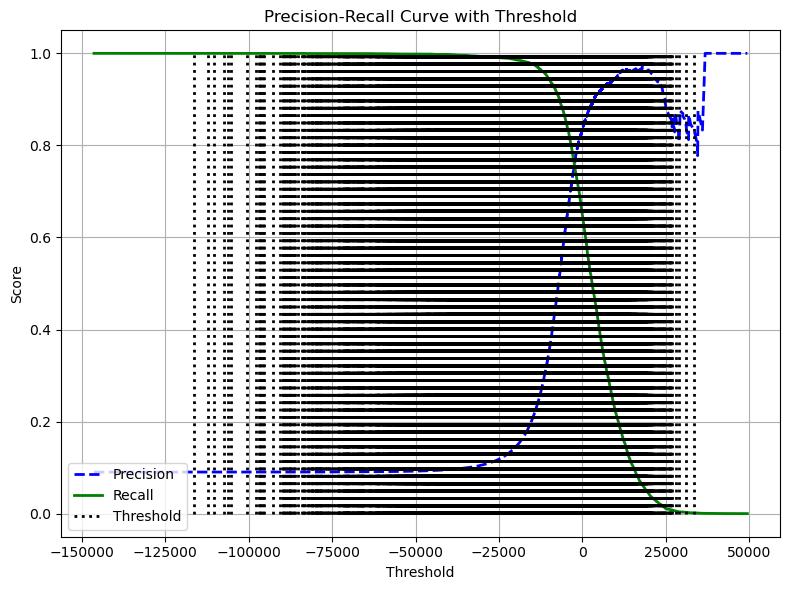

In [74]:
%matplotlib inline
plt.figure(figsize=(8, 6))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold", linewidth=2)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve with Threshold")

plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()

plt.show()

In [75]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision 

3370.0194991439557

In [76]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [77]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

KeyboardInterrupt: 

In [80]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])


array([[False,  True]])